In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter("ignore")

In [2]:
data=pd.read_csv('D:\Data Sets/Housing.csv')
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [3]:
data.shape

(20640, 10)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [5]:
data.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [6]:
data.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

In [7]:
y=data['ocean_proximity'].value_counts()
print(y)

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64


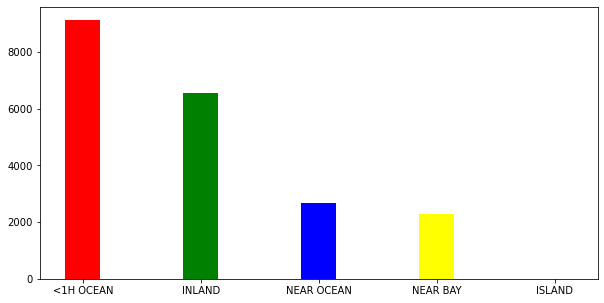

In [8]:
fig = plt.figure(figsize = (10, 5))
plt.bar(y.index,y.values, width = 0.3,color=['Red','Green','Blue','Yellow','Black'])
plt.show()

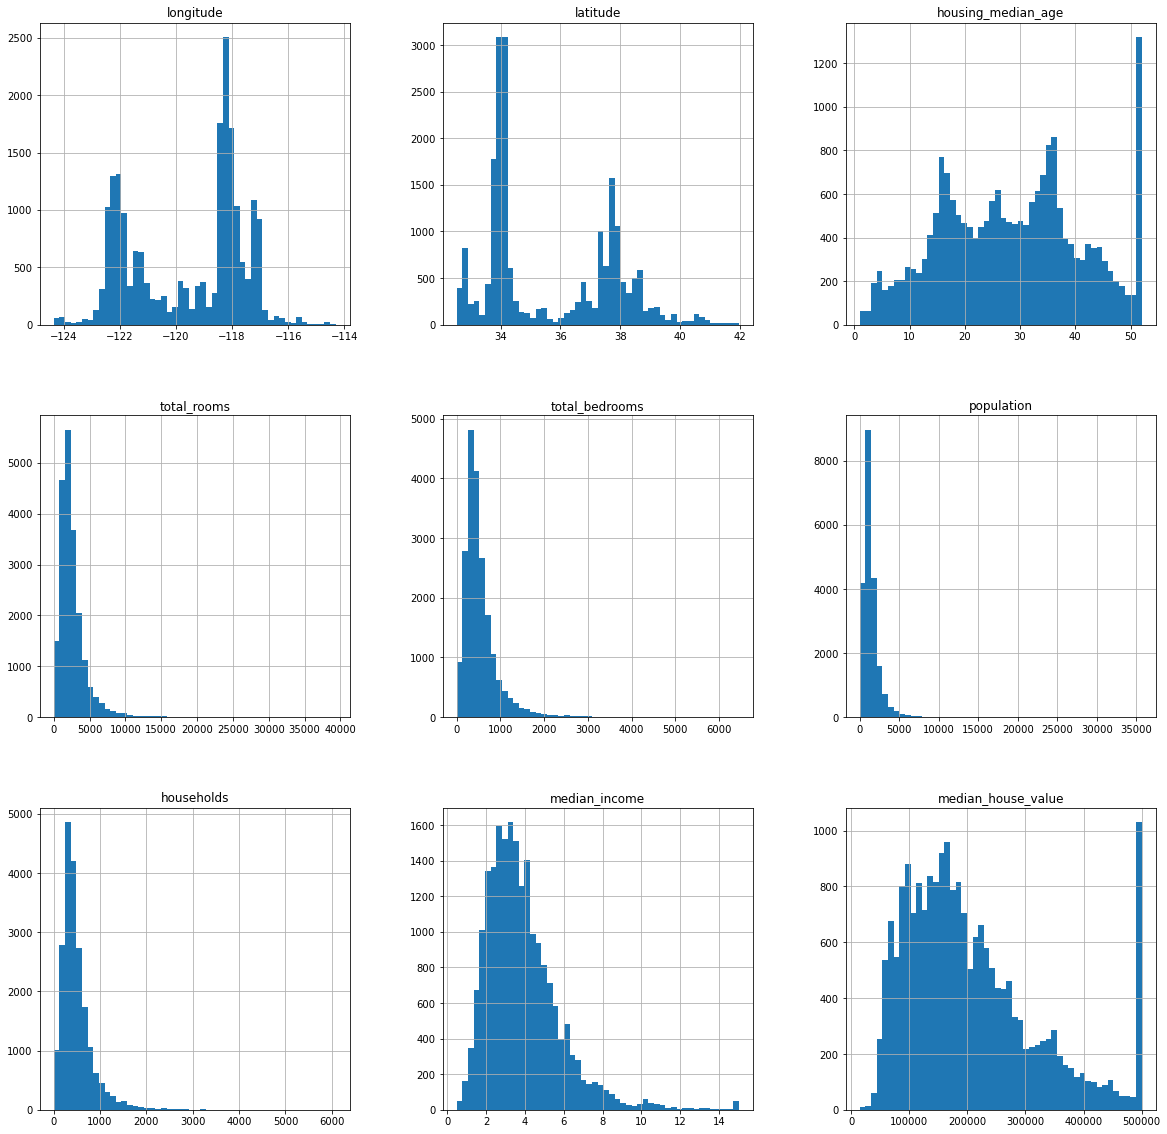

In [9]:
data.hist(bins =50, figsize=(20,20))
plt.show()

<AxesSubplot:>

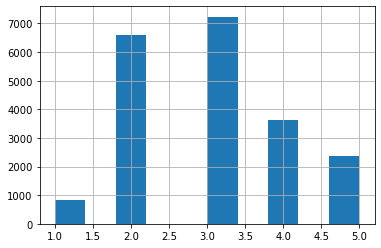

In [10]:
data['income_cat']= pd.cut(data["median_income"], bins=[0,1.5,3.0,4.5,6.0, np.inf], labels=[1,2,3,4,5])
data['income_cat'].hist()

# Stratified Sampling based on the income category

In [11]:
from sklearn.model_selection import StratifiedShuffleSplit

split= StratifiedShuffleSplit(n_splits = 1, test_size = 0.2, random_state= 42)
for train_index, test_index in split.split(data,data["income_cat"]):
    strat_train_set= data.loc[train_index]
    strat_test_set = data.loc[test_index]

In [12]:
strat_train_set["income_cat"].value_counts() / len(strat_test_set)

3    1.402374
2    1.275436
4    0.705184
5    0.457607
1    0.159399
Name: income_cat, dtype: float64

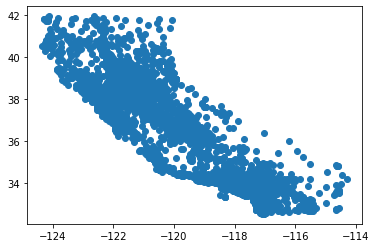

In [13]:
plt.scatter( x="longitude", y="latitude", data=data)
plt.show()

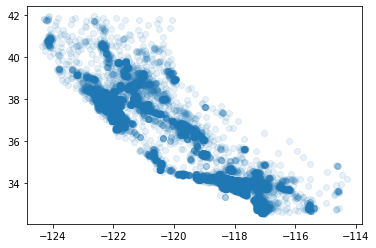

In [14]:
plt.scatter( x="longitude", y="latitude",alpha =0.1, data=data)
plt.show()

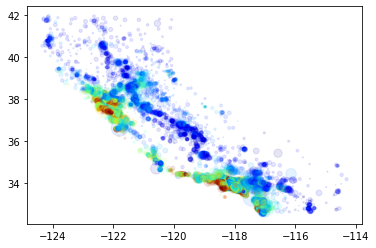

In [15]:
plt.scatter( x="longitude", y="latitude",alpha =0.1, data=data, s= data['population']/ 100, c='median_house_value', cmap=plt.get_cmap('jet'))
plt.show()

In [16]:
corr = data.corr()
corr.style.background_gradient(cmap='coolwarm')

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924664,-0.108197,0.044568,0.069608,0.099773,0.055310,-0.015176,-0.045967
latitude,-0.924664,1.000000,0.011173,-0.036100,-0.066983,-0.108785,-0.071035,-0.079809,-0.144160
housing_median_age,-0.108197,0.011173,1.000000,-0.361262,-0.320451,-0.296244,-0.302916,-0.119034,0.105623
total_rooms,0.044568,-0.036100,-0.361262,1.000000,0.930380,0.857126,0.918484,0.198050,0.134153
total_bedrooms,0.069608,-0.066983,-0.320451,0.930380,1.000000,0.877747,0.979728,-0.007723,0.049686
population,0.099773,-0.108785,-0.296244,0.857126,0.877747,1.000000,0.907222,0.004834,-0.024650
households,0.055310,-0.071035,-0.302916,0.918484,0.979728,0.907222,1.000000,0.013033,0.065843
median_income,-0.015176,-0.079809,-0.119034,0.198050,-0.007723,0.004834,0.013033,1.000000,0.688075
median_house_value,-0.045967,-0.144160,0.105623,0.134153,0.049686,-0.024650,0.065843,0.688075,1.000000


In [17]:
corr_matrix= data.corr()
corr_matrix['median_house_value'].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.688075
total_rooms           0.134153
housing_median_age    0.105623
households            0.065843
total_bedrooms        0.049686
population           -0.024650
longitude            -0.045967
latitude             -0.144160
Name: median_house_value, dtype: float64

array([[<AxesSubplot:xlabel='median_house_value', ylabel='median_house_value'>,
        <AxesSubplot:xlabel='median_income', ylabel='median_house_value'>,
        <AxesSubplot:xlabel='total_rooms', ylabel='median_house_value'>,
        <AxesSubplot:xlabel='housing_median_age', ylabel='median_house_value'>],
       [<AxesSubplot:xlabel='median_house_value', ylabel='median_income'>,
        <AxesSubplot:xlabel='median_income', ylabel='median_income'>,
        <AxesSubplot:xlabel='total_rooms', ylabel='median_income'>,
        <AxesSubplot:xlabel='housing_median_age', ylabel='median_income'>],
       [<AxesSubplot:xlabel='median_house_value', ylabel='total_rooms'>,
        <AxesSubplot:xlabel='median_income', ylabel='total_rooms'>,
        <AxesSubplot:xlabel='total_rooms', ylabel='total_rooms'>,
        <AxesSubplot:xlabel='housing_median_age', ylabel='total_rooms'>],
       [<AxesSubplot:xlabel='median_house_value', ylabel='housing_median_age'>,
        <AxesSubplot:xlabel='median_incom

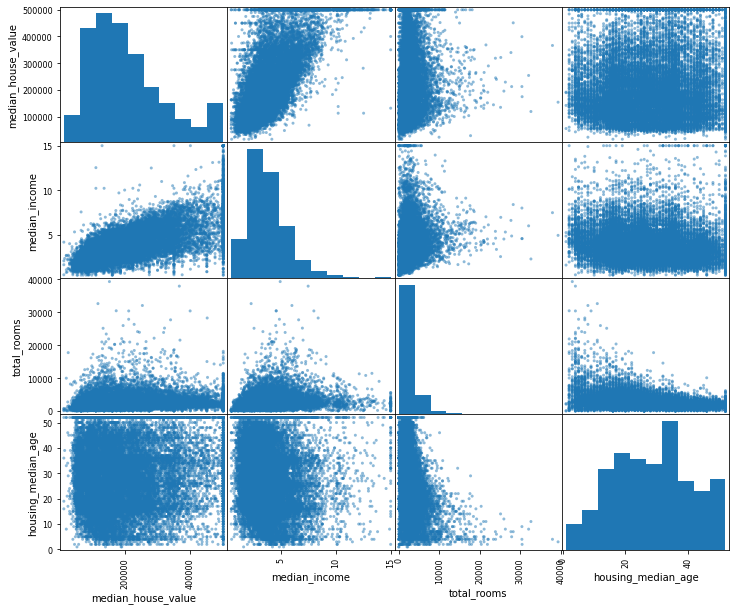

In [18]:
from pandas.plotting import scatter_matrix
attrributes =['median_house_value','median_income','total_rooms','housing_median_age']
scatter_matrix(data[attrributes], figsize=(12,10))

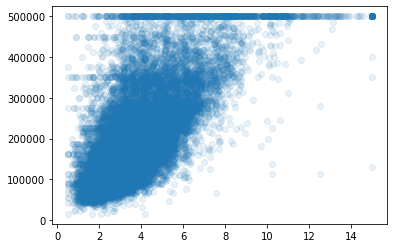

In [19]:
plt.scatter( x="median_income", y="median_house_value",alpha =0.1, data=data)
plt.show()

In [20]:
data['rooms_per_household']= data['total_rooms']/data['households']
data['bedrooms_per_room']= data['total_bedrooms']/data['total_rooms']
data['population_per_household']= data['population']/data['households']

In [21]:
corr_matrix=data.corr()
corr_matrix['median_house_value'].sort_values(ascending=False)

median_house_value          1.000000
median_income               0.688075
rooms_per_household         0.151948
total_rooms                 0.134153
housing_median_age          0.105623
households                  0.065843
total_bedrooms              0.049686
population_per_household   -0.023737
population                 -0.024650
longitude                  -0.045967
latitude                   -0.144160
bedrooms_per_room          -0.255880
Name: median_house_value, dtype: float64

In [22]:
data=strat_train_set.drop('median_house_value', axis=1)
housing_labels= strat_train_set['median_house_value'].copy()

# Data Cleaning

In [23]:
median=data['total_bedrooms'].median()
data['total_bedrooms'].fillna(median,inplace=True)

In [24]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy= 'median')

In [25]:
housing_num=data.drop("ocean_proximity", axis=1)

In [26]:
imputer.fit(housing_num)

SimpleImputer(strategy='median')

In [27]:
housing_num.median().values

array([-118.51  ,   34.26  ,   29.    , 2119.5   ,  433.    , 1164.    ,
        408.    ,    3.5409])

In [28]:
X=imputer.transform(housing_num)


# Heandling Text and Categorical Attributes


In [29]:
housing_cat=data[['ocean_proximity']]
housing_cat.head()

,ocean_proximity
17606,<1H OCEAN
18632,<1H OCEAN
14650,NEAR OCEAN
3230,INLAND
3555,<1H OCEAN


In [30]:
from sklearn.preprocessing import OrdinalEncoder
ordinal_encoder=OrdinalEncoder()
housing_cat_encoded = ordinal_encoder.fit_transform(housing_cat)
housing_cat_encoded[:10]


array([[0.],
       [0.],
       [4.],
       [1.],
       [0.],
       [1.],
       [0.],
       [1.],
       [0.],
       [0.]])

In [31]:
ordinal_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

In [32]:
from sklearn.preprocessing import OneHotEncoder
cat_encoder = OneHotEncoder()
housing_cat_1hot=cat_encoder.fit_transform(housing_cat)
housing_cat_1hot

<16512x5 sparse matrix of type '<class 'numpy.float64'>'
	with 16512 stored elements in Compressed Sparse Row format>

In [33]:
housing_cat_1hot.toarray()

array([[1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1.],
       ...,
       [0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0.]])

# Custom Transformer

In [34]:
from sklearn.base import BaseEstimator,TransformerMixin
rooms_ix,bedrooms_ix,population_ix,households_ix=3,4,5,6


class CombinedAttributesAdder(BaseEstimator,TransformerMixin):
    
    def __init__(self,add_bedrooms_per_room = True):
        self.add_bedrooms_per_room = add_bedrooms_per_room 
    
    def fit(self,X,y=None):
        return self
    
    def transform(self,X):
        rooms_per_household=X[:,rooms_ix]/ X[:,households_ix]
        population_per_household=X[:,population_ix]/X[:,households_ix]
        if self.add_bedrooms_per_room:
            bedrooms_per_room=X[:,bedrooms_ix]/X[:,rooms_ix]
            return np.c_[X,rooms_per_household, population_per_household,bedrooms_per_room]
        else:
            return np.c_[X,rooms_per_household,population_per_household]
attr_adder= CombinedAttributesAdder(add_bedrooms_per_room=False)
housing_extra_attribs=attr_adder.transform( data.values)

# Transformation Pipeline

In [35]:
##pipeline for numerical attributes

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
num_pipeline= Pipeline([
    ('imputer', SimpleImputer(strategy="median")),
    ('attributes_adder', CombinedAttributesAdder()),
    ('std_scaler', StandardScaler())
])

housing_num_tr = num_pipeline.fit_transform(housing_num)

In [36]:
from sklearn.compose import ColumnTransformer
num_attr =  list(housing_num)
cat_attr = ["ocean_proximity"]

full_pipeline = ColumnTransformer([
    ("num", num_pipeline, num_attr),
    ("cat", OneHotEncoder(),cat_attr)
])

housing_prepared =  full_pipeline.fit_transform(data)

# Select and train model

In [37]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(housing_prepared, housing_labels)

LinearRegression()

In [38]:
some_data = data.iloc[:5]
some_labels = housing_labels.iloc[:5]
some_data_prepared = full_pipeline.transform(some_data)
print("Prediction : ", list(lin_reg.predict(some_data_prepared)))


Prediction :  [203682.37379542593, 326371.3937078103, 204218.64588245464, 58685.477048200526, 194213.06443039078]


In [39]:
print("Labels :", list(some_labels))

Labels : [286600.0, 340600.0, 196900.0, 46300.0, 254500.0]


# Measuring RMSC for this model

In [40]:
from sklearn.metrics import mean_squared_error
housing_prediction = lin_reg.predict(housing_prepared)
lin_mse = mean_squared_error(housing_labels, housing_prediction)
lin_rmse =  np.sqrt(lin_mse)
lin_rmse

68376.64295459937

# Train a decission Tree Regression 

In [41]:
from sklearn.tree import DecisionTreeRegressor
tree_reg = DecisionTreeRegressor()
tree_reg.fit(housing_prepared, housing_labels)

DecisionTreeRegressor()

In [42]:
housing_prediction = tree_reg.predict(housing_prepared)
tree_mse = mean_squared_error(housing_labels, housing_prediction)
tree_rmse = np.sqrt (tree_mse)
tree_rmse

0.0

# Better Evaluation Using Cross Validation

In [43]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(tree_reg, housing_prepared, housing_labels, scoring = "neg_mean_squared_error", cv= 10)
tree_rmse_scores = np.sqrt(-scores)

In [44]:
def display_scores(scores):
    print("Scores : ", scores)
    print("Mean : ", scores.mean())
    print("Standerd deviation : ", scores.std())

In [45]:
display_scores(tree_rmse_scores)

Scores :  [69133.04324941 67539.92978183 70756.60443226 70820.07129281
 70033.29558523 74418.57206126 70101.61244676 70566.94688145
 78069.61997613 70545.01484073]
Mean :  71198.47105478731
Standerd deviation :  2809.9403416142586


##Lets compute the same scores for linear regression model

In [46]:
lin_scores = cross_val_score(lin_reg, housing_prepared, housing_labels, scoring ="neg_mean_squared_error", cv= 10)

In [47]:
lin_rmse_scores= np.sqrt(-lin_scores)

In [48]:
display_scores(lin_rmse_scores) 

Scores :  [66877.52325028 66608.120256   70575.91118868 74179.94799352
 67683.32205678 71103.16843468 64782.65896552 67711.29940352
 71080.40484136 67687.6384546 ]
Mean :  68828.99948449331
Standerd deviation :  2662.761570610339


# Lets try Random Forest  model

In [62]:
from sklearn.ensemble import RandomForestRegressor
forest_reg = RandomForestRegressor()
forest_reg.fit(housing_prepared,housing_labels)

RandomForestRegressor()

In [63]:
housing_prediction = forest_reg.predict(housing_prepared)
forest_mse = mean_squared_error(housing_labels, housing_prediction)
forest_rmse = np.sqrt (tree_mse)

In [64]:
forest_rmse

0.0

#Better Evaluation with Cross Validation

In [60]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(forest_reg, housing_prepared, housing_labels, scoring = "neg_mean_squared_error", cv= 10)
forest_rmse_scores = np.sqrt(-scores)

In [61]:
display_scores(forest_rmse_scores) 

Scores :  [49777.9337249  47560.88161041 50109.10001313 52263.28544348
 49712.44002041 53539.36733506 49134.85264789 47630.93091032
 53087.97543784 50203.67562199]
Mean :  50302.04427654194
Standerd deviation :  1968.9724360989464


##Serialise numpy array with joblib libraries and save python model with Pythons pickle module

In [81]:
import joblib
joblib.dump(my_model,"my_model.pkl")
my_model_loaded = joblib.load("my_model.pkl")

NameError: name 'my_model' is not defined

# Hypermeter optimization with grid search

In [55]:
from sklearn.model_selection import GridSearchCV
param_grid=[{'n_estimators' : [3,18,38], 'max_feature':[2,4,6,8]},
             {'bootstrap' : [False], 'n_estimators' : [3,18], 'max_features' : [2,3,4]},
           
           ]
forest_reg=RandomForestRegressor()

grid_search = GridSearchCV(forest_reg,param_grid, cv = 5, scoring = 'neg_mean_squared_error', return_train_score = True)
grid_search.fit(housing_prepared, housing_labels)

ValueError: Invalid parameter max_feature for estimator RandomForestRegressor(). Check the list of available parameters with `estimator.get_params().keys()`.

In [59]:
grid_search.best_params_

AttributeError: 'GridSearchCV' object has no attribute 'best_params_'

# Analyze the best models and their Errors

In [58]:
feature_importances = grid_search.best_estimator_.feature_importances_

AttributeError: 'GridSearchCV' object has no attribute 'best_estimator_'

In [57]:
feature_importances

NameError: name 'feature_importances' is not defined

In [66]:
extra_attributes = ["rooms_per_hold","po_per_hold", "bedroom_per_room"]
cat_encoder = full_pipeline.named_transformers_["cat"]
cat_one_hot_attribs = list(cat_encoder.categories_[0])
cat_one_hot_attributes = num_atribs + extra_attribute + cat_one_hot_attribs
sorted(zip(feature_importances,attributes),reverse= True)

NameError: name 'num_atribs' is not defined

# Evaluating our system on the test set

In [67]:
final_model = grid_search.best_estimator_

x_test = strat_test_set.drop("median_house_value", axis  = 1)
y_test = strat_test_set["median_house_value"].copy()

x_test_prepared = full_pipeline.transform(x_test)
final_prediction =final_model.predict(x_test_prepared)

final_mse = mean_squared_error(y_test, final_prediction)
final_rmse = np.sqrt(final_mse)

AttributeError: 'GridSearchCV' object has no attribute 'best_estimator_'

In [68]:
from scipy import stats
confidence = 0.95
squared_errors = (final_prediction - y_test) ** 2 
np.sqart(stats.t.interval(confidence , len(squared_errors) -1,
                         loc = squared_errors.mean(),
                         scale = stats.sem(squared_errors)))    

NameError: name 'final_prediction' is not defined